In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
database = pd.read_csv('database.csv')
database.head(100)

,samples,type,NM_004900,AA085955,NM_014616,AK092846,NM_001539,THC2450799,NM_006709,NM_000978,...,AF117899,A_24_P287526,THC2349421,THC2272949,NM_138411,THC2350949,CR600872,NM_016058,AF520801,NM_203414
0,GSM831223_ATL-_1,ATL,7.759333,5.526977,9.279413,4.730458,11.097001,5.409710,6.194557,14.282856,...,5.856063,6.534970,6.035496,7.476790,4.866324,4.612706,6.109501,9.462370,4.612706,8.484984
1,GSM831224_ATL-_2,ATL,6.080513,5.503887,9.128079,4.903375,10.930584,4.631126,6.381124,14.280562,...,5.826412,6.413272,5.948900,5.948900,5.269268,4.698254,5.718088,9.490950,4.663896,7.095295
2,GSM831225_ATL-_3,ATL,9.594372,6.582465,9.838391,5.881773,11.568524,5.305547,6.743412,14.235741,...,5.548070,5.928725,6.013459,8.529502,5.471272,4.700643,5.834031,9.543813,4.882895,8.562290
3,GSM831226_ATL-_4,ATL,5.668196,5.513552,8.622807,4.830928,11.720891,4.651672,6.116554,14.611248,...,5.770464,6.347991,6.844252,8.372397,5.240151,5.073481,5.073481,10.083024,4.782399,6.541959
4,GSM831227_ATL-_5,ATL,7.979572,5.193283,8.893503,5.030561,11.073585,5.347932,6.014682,14.596186,...,5.383804,5.878142,5.353299,7.449356,5.224082,5.038731,5.279458,9.853553,4.671153,7.844617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,GSM831291_N-18,normal,7.554990,5.162356,9.227452,5.110411,10.851218,4.539933,5.970369,14.764746,...,5.841869,6.285331,6.499445,5.753790,4.620095,4.730262,6.718944,10.073191,4.592908,7.980765
67,GSM831292_N-19,normal,8.730759,4.915564,9.116639,4.779687,10.905595,4.509549,5.602854,14.983342,...,5.852524,6.314438,6.401015,6.236973,4.682609,5.789204,6.426232,9.993706,4.535060,8.085866
68,GSM831293_N-20,normal,6.988014,5.628204,9.509945,5.220095,11.169697,4.707079,6.080440,14.983342,...,5.948501,6.215585,6.241200,6.165282,4.707079,4.877436,6.647696,10.188872,4.487878,6.959068
69,GSM831294_N-21,normal,7.141477,5.471494,9.482911,5.287084,10.959047,4.800094,6.019773,14.717964,...,6.006081,6.471587,6.971142,6.329035,4.814379,5.215938,6.703744,10.100427,4.553095,7.847020


(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 21.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

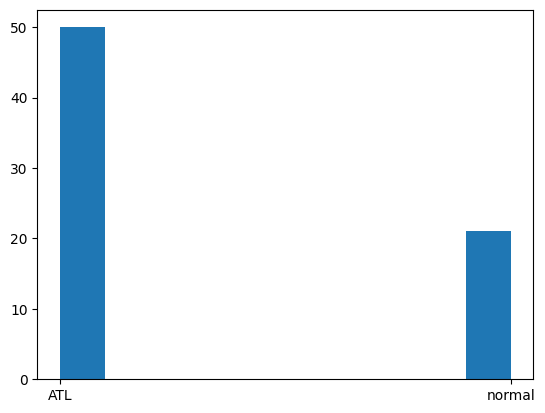

In [3]:
# visualizar a distribuição dos dados
plt.hist(database['type'], bins=10)

In [4]:
# separar os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(database.drop(['type','samples'], axis=1), database['type'], test_size=0.30, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49, 33579), (22, 33579), (49,), (22,))

In [6]:
y_train.value_counts(), y_test.value_counts()

(ATL       33
 normal    16
 Name: type, dtype: int64,
 ATL       17
 normal     5
 Name: type, dtype: int64)

# Aprendizagem de Máquina - Árvores de Decisão

In [7]:
# treinar o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# encontrar quais são as features mais importantes e organizar em ordem decrescente
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

for i in range(X_train.shape[1]):
    print(f"{i+1} {feature_names[indices[i]]} {importances[indices[i]]}")


1 NM_015144 0.03
2 AK026418 0.03
3 NM_005546 0.02
4 NM_003731 0.02
5 NM_005813 0.02
6 AB037793 0.02
7 NM_019012 0.02
8 AK097472 0.02
9 NM_000558 0.01912655971479501
10 NM_018961 0.01
11 NM_001838 0.01
12 ENST00000254846 0.01
13 NM_015087 0.01
14 ENST00000334827 0.01
15 NM_022742 0.01
16 NM_006608 0.01
17 NM_020347 0.01
18 NM_001003408 0.01
19 NM_015990 0.01
20 NM_006628 0.01
21 NM_000791 0.01
22 CA337741 0.01
23 AF216184 0.01
24 NM_018407 0.01
25 NM_001002033 0.01
26 NM_003896 0.01
27 A_32_P214565 0.01
28 CR603272 0.01
29 NM_177974 0.01
30 NM_013345 0.01
31 NM_004073 0.01
32 NM_016492 0.01
33 NM_181726 0.01
34 NM_173496 0.01
35 NM_030809 0.01
36 NM_018405 0.01
37 NM_173656 0.01
38 A_32_P22679 0.01
39 AK094156 0.01
40 NM_018166 0.01
41 NM_052845 0.01
42 NM_001037341 0.01
43 NM_015393 0.01
44 NM_207630 0.01
45 NM_014710 0.01
46 A_23_P258108 0.01
47 NM_145753 0.01
48 NM_138499 0.01
49 NM_030799 0.01
50 NM_012162 0.01
51 THC2315555 0.01
52 NM_001166 0.01
53 NM_145341 0.01
54 NM_006693 0.01

In [9]:
# prever os dados de teste
y_pred = rf.predict(X_test)

# avaliar o modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

<Axes: >

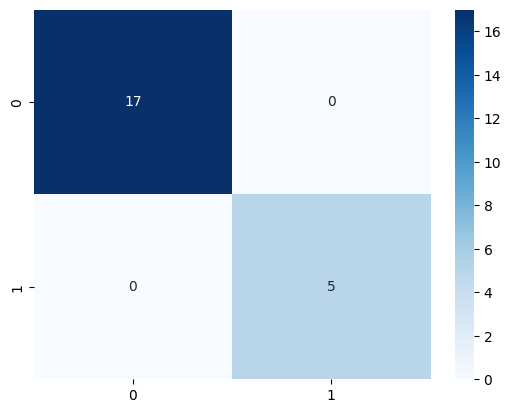

In [10]:
# visualizar a matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

<Axes: >

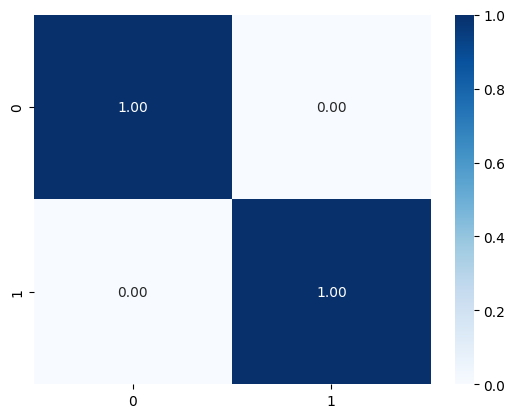

In [11]:
# visualizar a matriz de confusão normalizada
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2f')

In [12]:
%pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/home/jonathan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


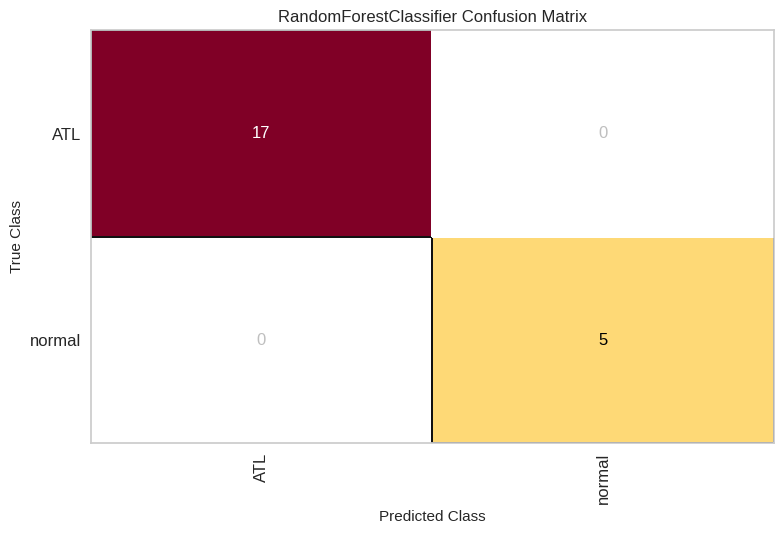

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [13]:
# matriz de confusao com yellowbrick
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()


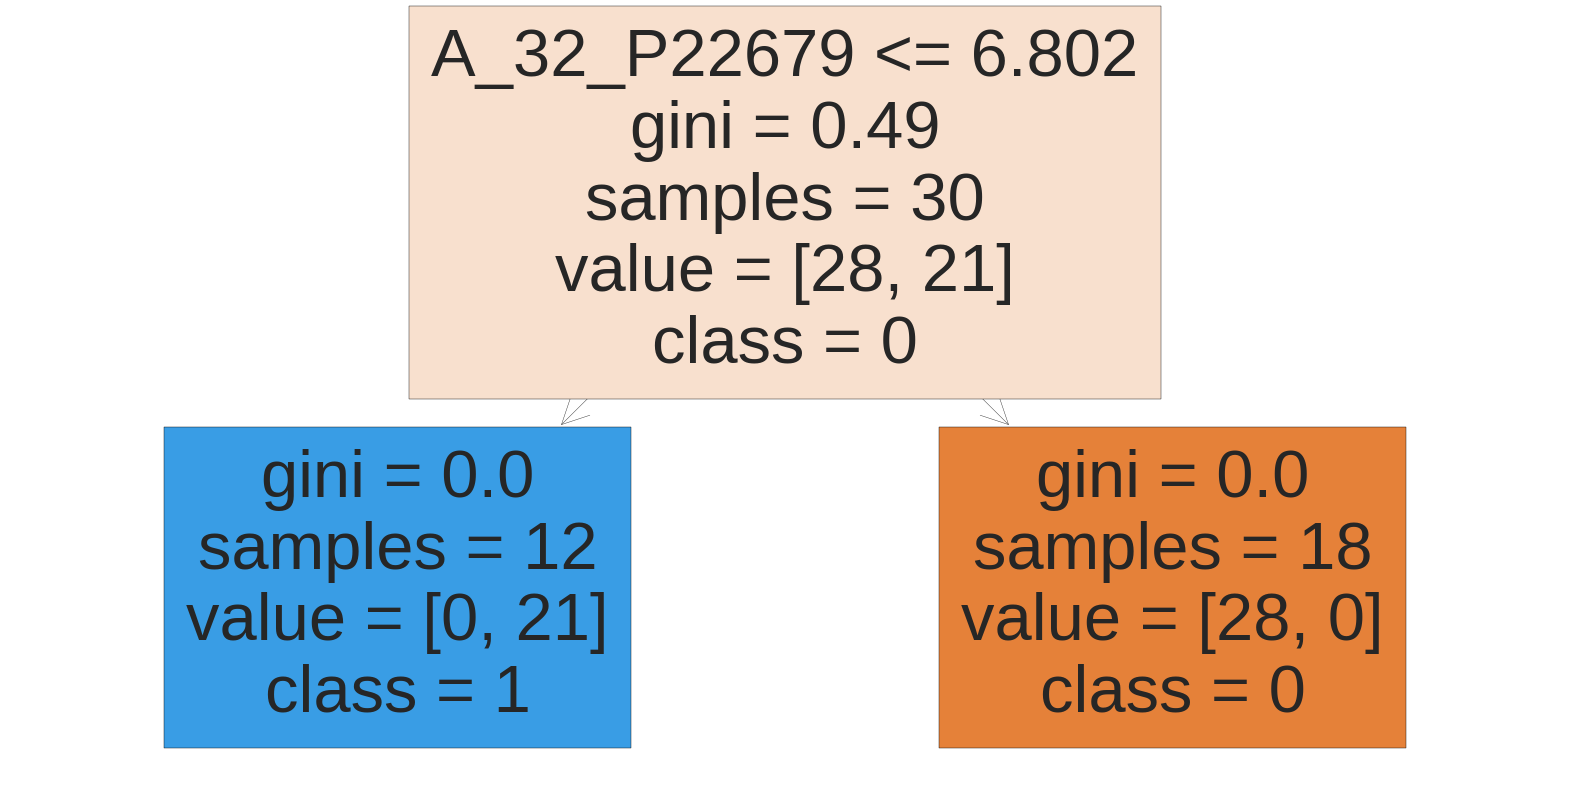

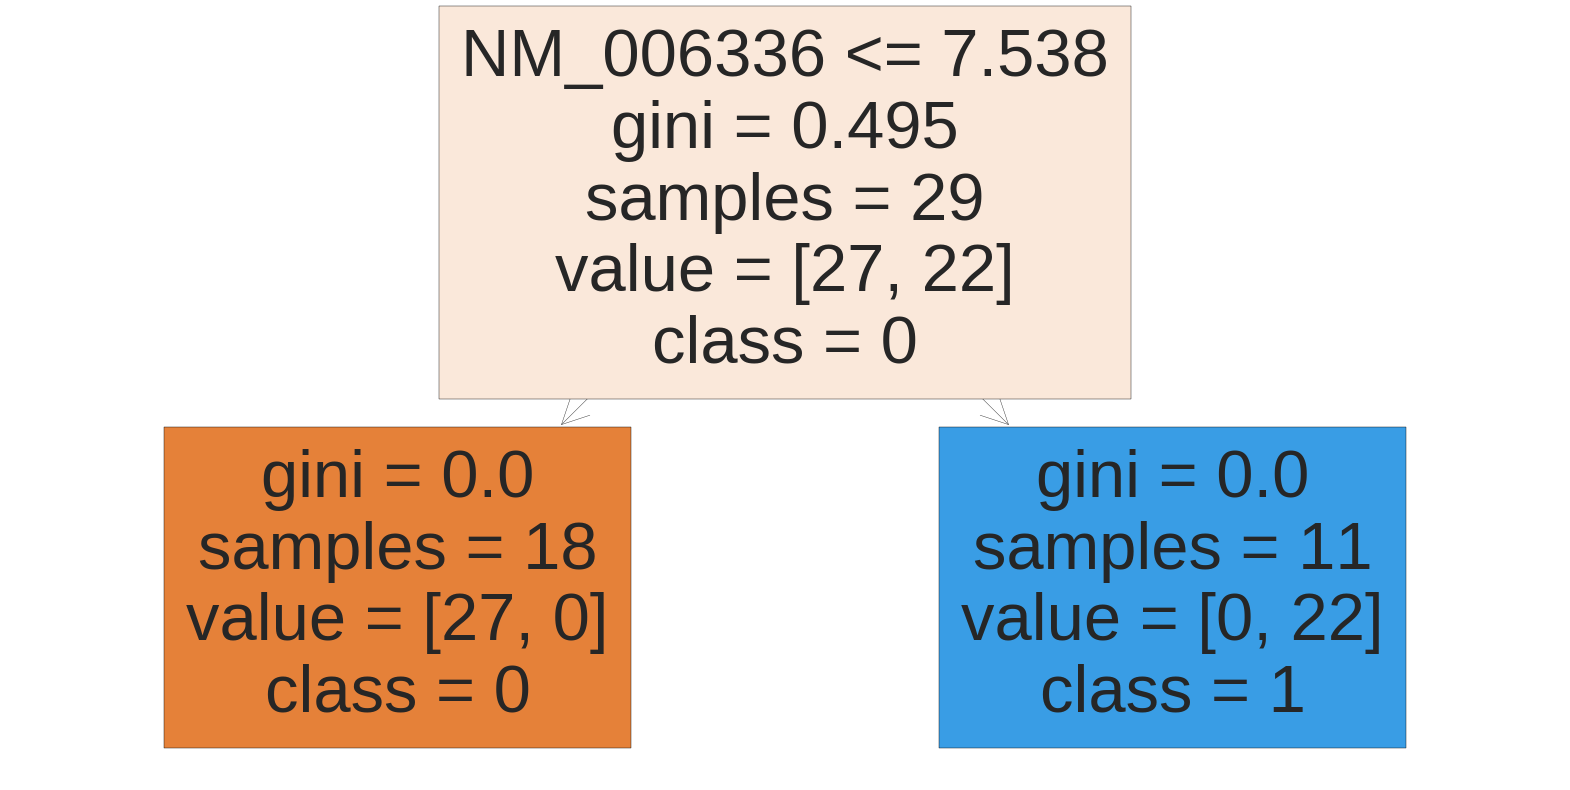

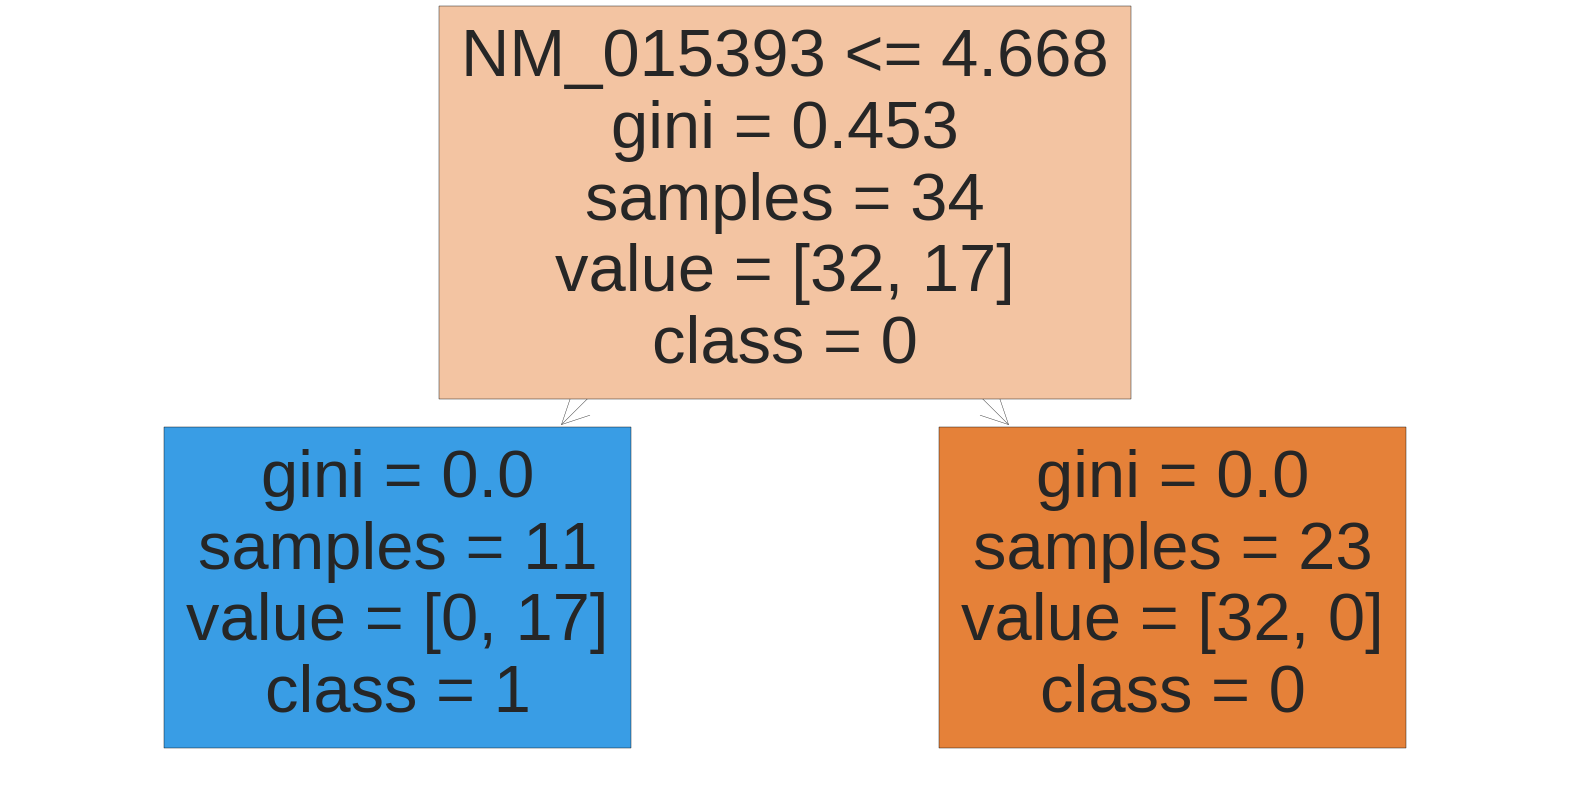

In [14]:
# plot the trees in the forest
from sklearn.tree import plot_tree
for i in range(3):
    plt.figure(figsize=(20,10))
    plot_tree(rf.estimators_[i], feature_names=feature_names, class_names=['0','1'], filled=True)
    plt.show()